# exc 1a

Creating a dataset for:

$$
f(x) = \frac{1}{1+25x^2}, \quad x \in [-1,1]
$$

In [3]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
import seaborn as sns 
from numpy.random import rand
from numpy.random import seed

In [4]:
#n = 100
#x = np.linspace(-1,1, n) #x within interval [-1,1]
#denominator = 1+(25*x**2)
#defining y and adding noise as a normal distrubution with mean 0 and std 1
#y = 1/denominator + np.random.normal(0, 1, x.shape) 

np.random.seed(3155)


In [5]:
#Perform a standard ordinary least square regression analysis
#Import polynimial features from func_list and OLS_parameters
from func_list import polynomial_features, OLS_parameters#, mse_poly_plot
#Runge´s function
def runge_func(x):
    noise = np.random.normal(loc=0, scale=1, size=len(x))
    runge = 1/(1+25*x**2) + noise
    return runge

#Function without Noise
def runge_func_wo_noise(x):
    runge = 1/(1+25*x**2)
    return runge

#The function creates a designmatrix X either with or without the intercept.
def polynomial_features(x, p, intercept=bool):
    n = len(x)
    X = np.zeros((n, p + 1)) 
    if intercept == True: #Keeps a first column of ones
        for i in range(p+1):
            X[:, i] = x**i
    elif intercept == False: #jumps to first column of values
        for i in range(1,p+1):
            X[:,i] = x**i
    else:
        raise TypeError(f"Please include a boolean response to the function parameter the intercept")
    return X


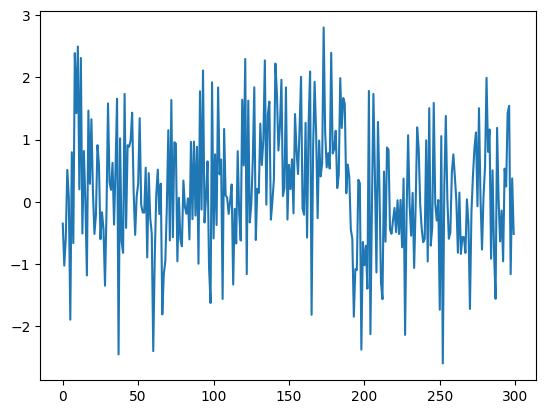

In [6]:
#The task says to use a polynomial higher than 15 so we have used 16 with intercept not included
#X_task1 = polynomial_features(x, p = 16, intercept = False) 

#checking that it works as it should
#print(X_task1) 


 #create dataset
n=300
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator + np.random.normal(0, 1, x.shape) 
plt.plot(y)

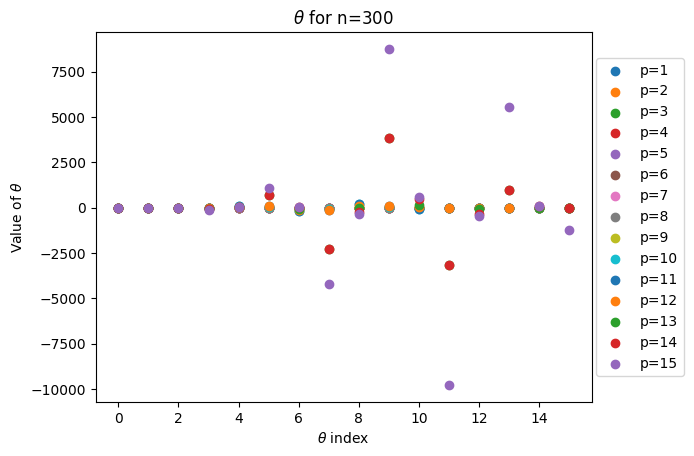

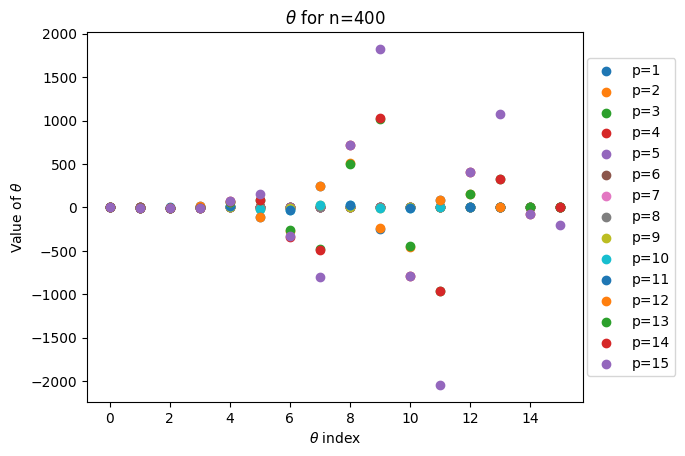

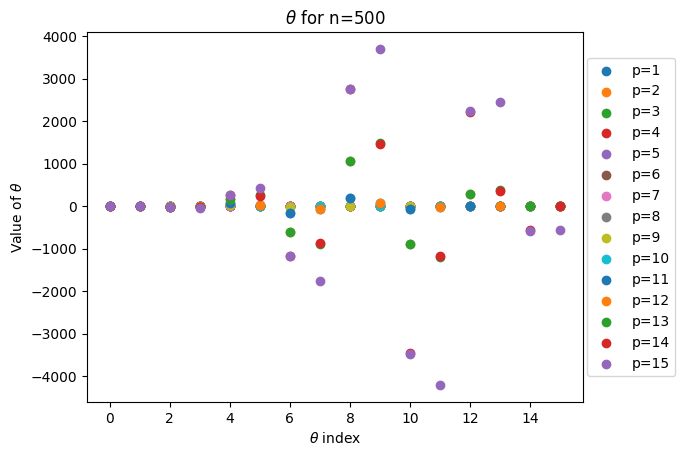

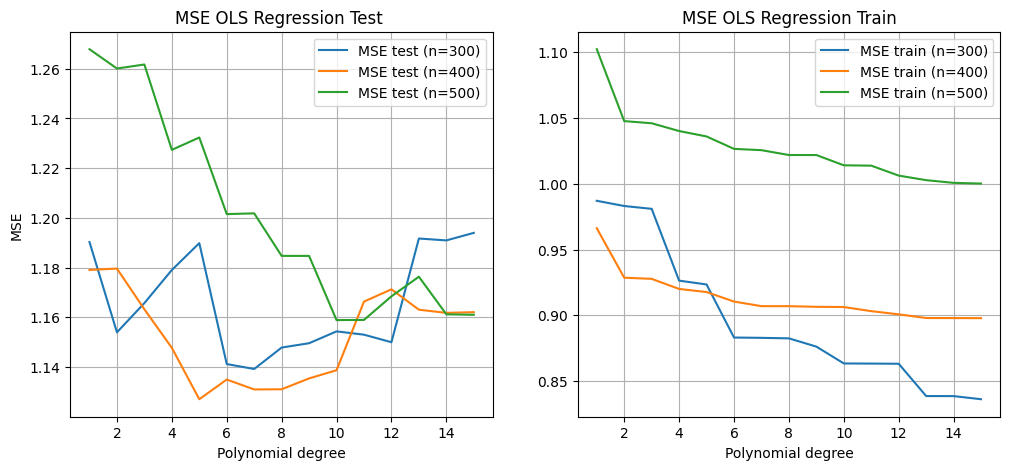

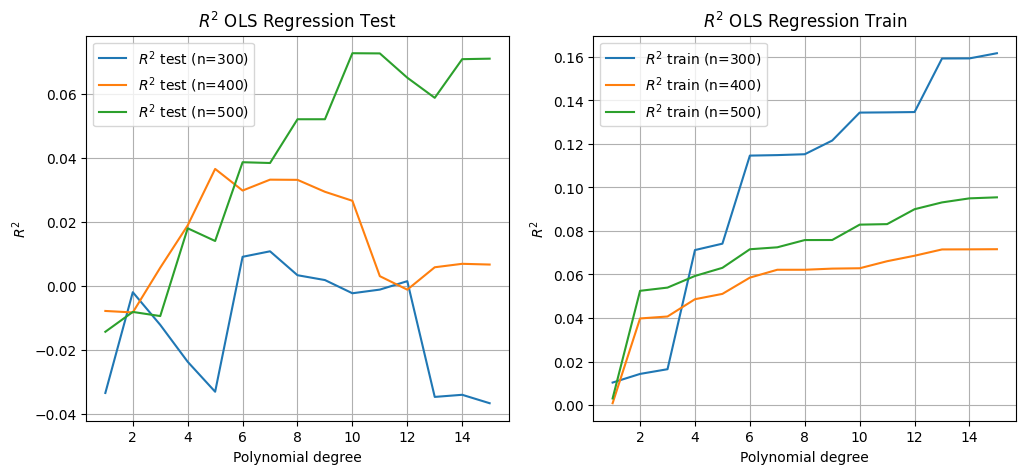

In [7]:
#Now that we have our design matrix, I will use the function mse_poly_plot
#explain the code later!!!!!!!

def mse_poly_plot_OLS(degree, intercept=False):
    np.random.seed(3155)

    poly_deg = np.arange(1, degree+1)
    results = {}

    for n in [300, 400, 500]:
        x = np.linspace(-1, 1, n)
        denominator = 1+(25*x**2)
        y = 1.0 / denominator + np.random.normal(0, 1, x.shape)


        mse_train_list = np.zeros(degree)
        mse_test_list = np.zeros(degree)
        R2_test = np.zeros(degree)
        R2_train = np.zeros(degree)
        beta_matrix = np.zeros((degree, degree+1))
        beta_array = np.arange(degree+1)

        # range polynomial degree
        for p in range(1, degree+1):
            X = polynomial_features(x, p, intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
            scaler = StandardScaler(with_std=False)
            scaler.fit(X_train)
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_scaled_train = (y_train - y_mean)

            beta = OLS_parameters(X_train_s, y_scaled_train)

            y_pred_train = X_train_s @ beta + y_mean
            y_pred_test = X_test_s @ beta + y_mean

            mse_train_list[p-1] = MSE(y_train, y_pred_train)
            mse_test_list[p-1] = MSE(y_test, y_pred_test)
            R2_test[p-1] = r2_score(y_test, y_pred_test)
            R2_train[p-1] = r2_score(y_train, y_pred_train)

            # Storing betas in a matrix and plotting the betas 
            for i in range(len(beta)):
                beta_matrix[p-1, i] = beta[i]
            plt.scatter(beta_array, beta_matrix[p-1, :], label=f'p={p}')

        plt.xlabel(r'$\theta$ index')
        plt.ylabel(r'Value of $\theta$')
        plt.title(fr'$\theta$ for n={n}')
        plt.legend(bbox_to_anchor=(1.2,0.5), loc='center right')
        plt.show()

        #Storing the results for plotting as dictionary
        results[n] = {
            "mse_train": mse_train_list,
            "mse_test": mse_test_list,
            "R2_train": R2_train,
            "R2_test": R2_test
        }

    fig1, ax1 = plt.subplots(1,2, figsize=(12,5))

    for n, vals in results.items():
        ax1[0].plot(poly_deg, vals["mse_test"], label=f"MSE test (n={n})")
        ax1[1].plot(poly_deg, vals["mse_train"], label=f"MSE train (n={n})")

    ax1[0].set_title("MSE OLS Regression Test ")
    ax1[1].set_title("MSE OLS Regression Train")
    ax1[0].set_xlabel("Polynomial degree")
    ax1[1].set_xlabel("Polynomial degree")
    ax1[0].set_ylabel("MSE")
    ax1[0].set_ylabel("MSE")
    ax1[0].grid(True)
    ax1[1].grid(True)
    ax1[1].legend()
    ax1[0].legend()

    fig2, ax2 = plt.subplots(1,2, figsize=(12,5))
    for n, vals in results.items():
        ax2[0].plot(poly_deg, vals["R2_test"], label=fr'$R^2$ test (n={n})')
        ax2[1].plot(poly_deg, vals["R2_train"], label=fr'$R^2$ train (n={n})')
    ax2[0].set_title(r"$R^2$ OLS Regression Test ")
    ax2[0].set_xlabel("Polynomial degree")
    ax2[0].set_ylabel(r"$R^2$")
    ax2[1].set_ylabel(r"$R^2$")
    ax2[1].set_xlabel("Polynomial degree")
    ax2[0].grid(True)
    ax2[1].grid(True)
    ax2[0].legend()
    ax2[1].legend()
    ax2[1].set_title(r"$R^2$ OLS Regression Train")      
    ax2[0].legend() 
    plt.show()

    return beta

beta_ols = mse_poly_plot_OLS(degree=15, intercept=False)


#lag om til to plots:
#et subplots med to figurer med train og test for MSE
#et subplots med to figurer med train og test for R2

In the above code we have used the optimization of OLS to find the parameter theta of a 
linear regression model that best describes/fits our data by minimizing the sum 
sum of the squared differences between the actual data points and the predicted values.

# exercise 1C

In [8]:
#create dataset 
n = 1000
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator + np.random.normal(0, 1, x.shape)

def gradient(x,y,n_feat, degree=15):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    lam = 0.1 #fixed lambda for the Ridge
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)

    for eta_vary in [0.01, 0.05, 0.1]:
        eta = eta_vary
        n = len(y)
    
        #loop
        for p in range(1,degree+1):
        #Create X_polynomial and scale 
            X = polynomial_features(x,15, intercept = False)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            scaler = StandardScaler(with_std=True)
            scaler.fit(X_train) 
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_std = np.std(y_train)
            y_scaled_train = (y_train - y_mean)/y_std

            #gradient descent OLS 
            for t in range(num_iters):
                grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
                theta_gdOLSn -= grad_OLSn * eta_vary

            #gradient descent Ridge
            tol = 1e-10
            for t in range(num_iters):
            # Compute gradients for Ridge
                grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
                # Update parameters theta
                theta_gdRidgen -= grad_Ridgen * eta_vary

                if (np.linalg.norm(grad_Ridgen*eta_vary) < tol):
                    print(f'loop broken at {str(t)} for degree: {p}')
                    break
        
            #predicting vals 
            y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
            y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
            y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
            y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
            #predicting r2 scores
            r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
            r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
            r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
            r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
            #predicting mse 
            mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
            mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
            mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
            mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)
            print(degree_plot.shape)
            print(mse_gdOLSn_test)
        

        fig,ax = plt.subplots(2,2,figsize=(16,16))
        ax[0,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
        ax[0,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
        ax[0,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
        ax[0,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
        ax[0,1].set_title(fr'R2 scores for the Ridge Regression with $\eta$ = {eta_vary}')
        ax[0,0].set_title(fr'R2 scores for the OLS Regression with $\eta$ = {eta_vary}')
        for labels in ax[0,:]:
            labels.set_ylabel('R2 score')
            labels.set_xlabel('Polynomial degree')
            labels.grid(True)
            labels.legend()
        ax[1,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
        ax[1,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
        ax[1,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
        ax[1,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
        ax[1,0].set_title(fr'MSE for the OLS Regression with $\lambda$ = {lam} and $\eta$ = {eta_vary}')
        ax[1,1].set_title(fr'MSE for the Ridge Regression with $\lambda$ = {lam} and $\eta$ = {eta_vary}')
        for labels_mse in ax[1,:]:
            labels_mse.set_ylabel('MSE')
            labels_mse.set_xlabel('Polynomial Degree')
            labels_mse.grid(True)
            labels_mse.legend()
        plt.tight_layout()
        plt.show()

    return theta_gdOLSn,theta_gdRidgen


#del opp til to subplots heller + dropp begge
#spesifiser lambda i ridge


(15,)
[1.13651686 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  1.19654194 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  1.19654194 0.99468981 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  1.19654194 0.99468981 0.93429757 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  1.19654194 0.99468981 0.93429757 1.07190162
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
(15,)
[1.13651686 0.9771502  1.1965419

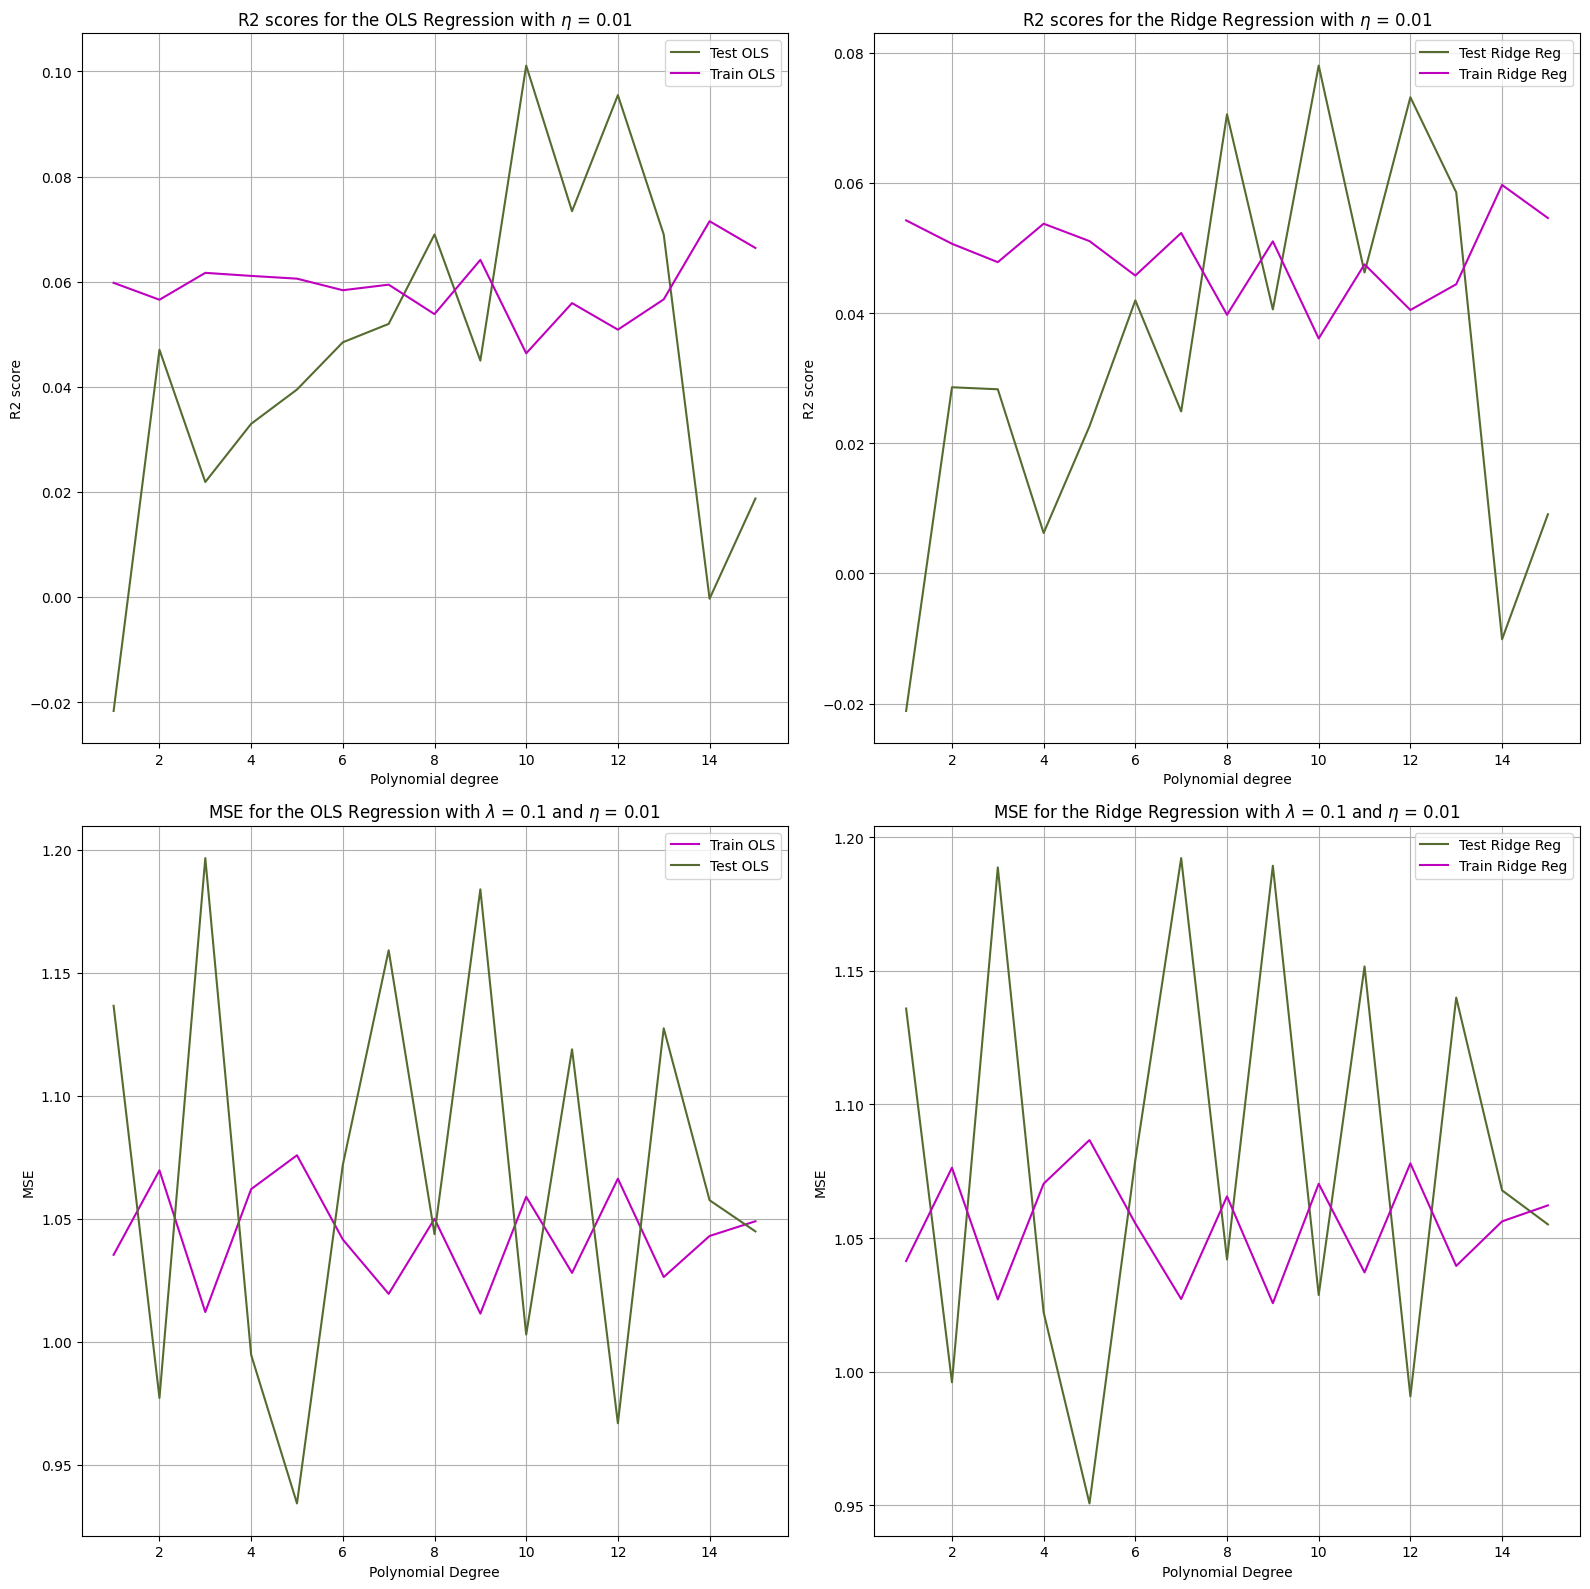

(15,)
[1.19889261 0.9771502  1.19654194 0.99468981 0.93429757 1.07190162
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.9668905
 1.12738665 1.057519   1.04484952]
(15,)
[1.19889261 0.9697903  1.19654194 0.99468981 0.93429757 1.07190162
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.9668905
 1.12738665 1.057519   1.04484952]
(15,)
[1.19889261 0.9697903  1.07718857 0.99468981 0.93429757 1.07190162
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.9668905
 1.12738665 1.057519   1.04484952]
(15,)
[1.19889261 0.9697903  1.07718857 1.18883028 0.93429757 1.07190162
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.9668905
 1.12738665 1.057519   1.04484952]
(15,)
[1.19889261 0.9697903  1.07718857 1.18883028 1.09807634 1.07190162
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.9668905
 1.12738665 1.057519   1.04484952]
(15,)
[1.19889261 0.9697903  1.07718857 1.18883028 1.09807634 0.9280275
 1.1590857  1.04372914 1.1838559  1.00294156 1.11883694 0.

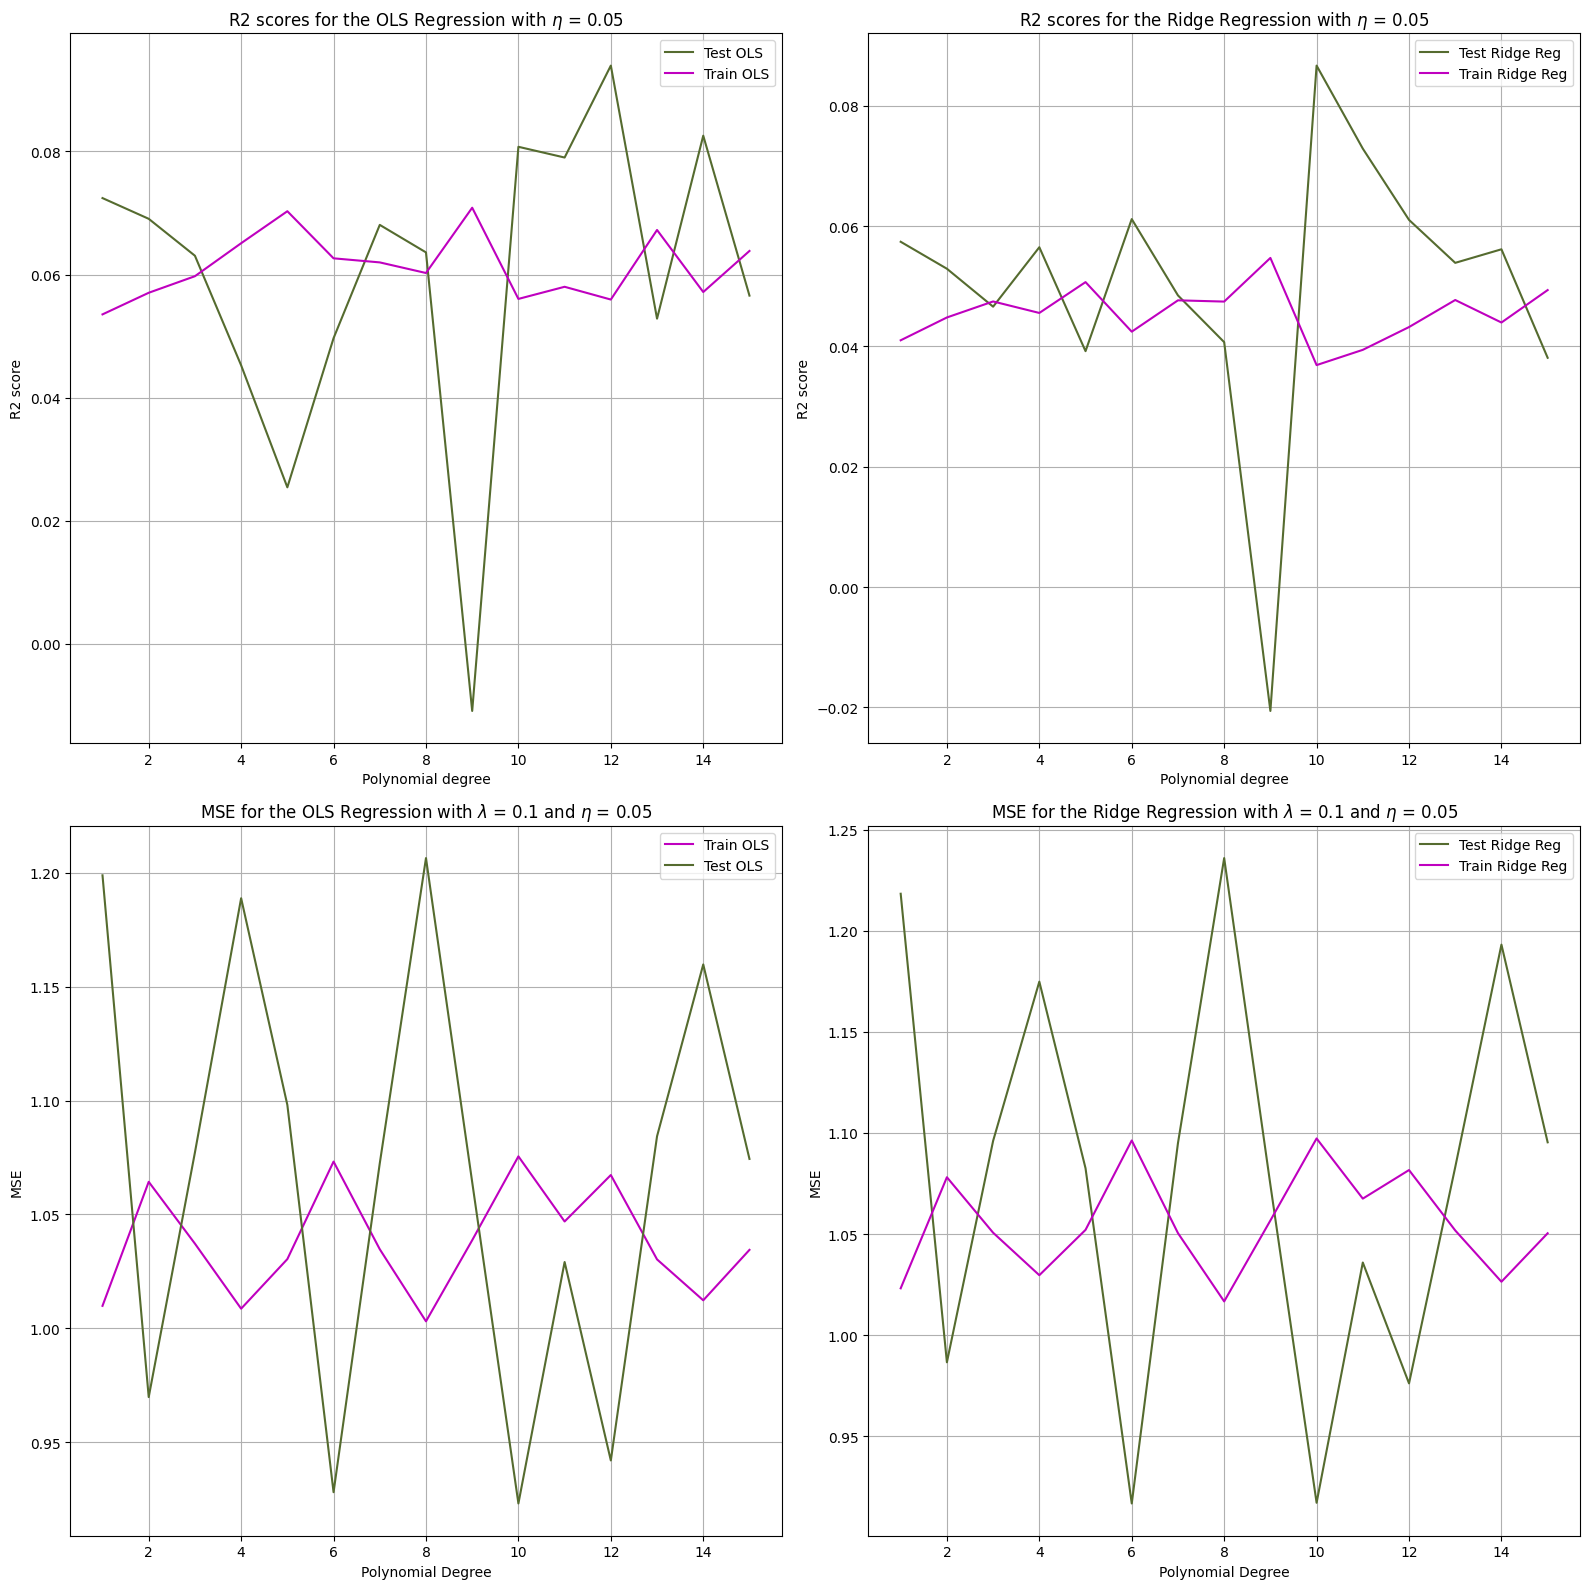

loop broken at 693 for degree: 1
(15,)
[1.12942065 0.9697903  1.07718857 1.18883028 1.09807634 0.9280275
 1.07242357 1.20644927 1.06416944 0.9230831  1.02909442 0.94195637
 1.0843056  1.15975968 1.07436518]
loop broken at 679 for degree: 2
(15,)
[1.12942065 1.15410039 1.07718857 1.18883028 1.09807634 0.9280275
 1.07242357 1.20644927 1.06416944 0.9230831  1.02909442 0.94195637
 1.0843056  1.15975968 1.07436518]
loop broken at 714 for degree: 3
(15,)
[1.12942065 1.15410039 1.11938818 1.18883028 1.09807634 0.9280275
 1.07242357 1.20644927 1.06416944 0.9230831  1.02909442 0.94195637
 1.0843056  1.15975968 1.07436518]
loop broken at 723 for degree: 4
(15,)
[1.12942065 1.15410039 1.11938818 1.05224045 1.09807634 0.9280275
 1.07242357 1.20644927 1.06416944 0.9230831  1.02909442 0.94195637
 1.0843056  1.15975968 1.07436518]
loop broken at 726 for degree: 5
(15,)
[1.12942065 1.15410039 1.11938818 1.05224045 0.92590851 0.9280275
 1.07242357 1.20644927 1.06416944 0.9230831  1.02909442 0.94195637


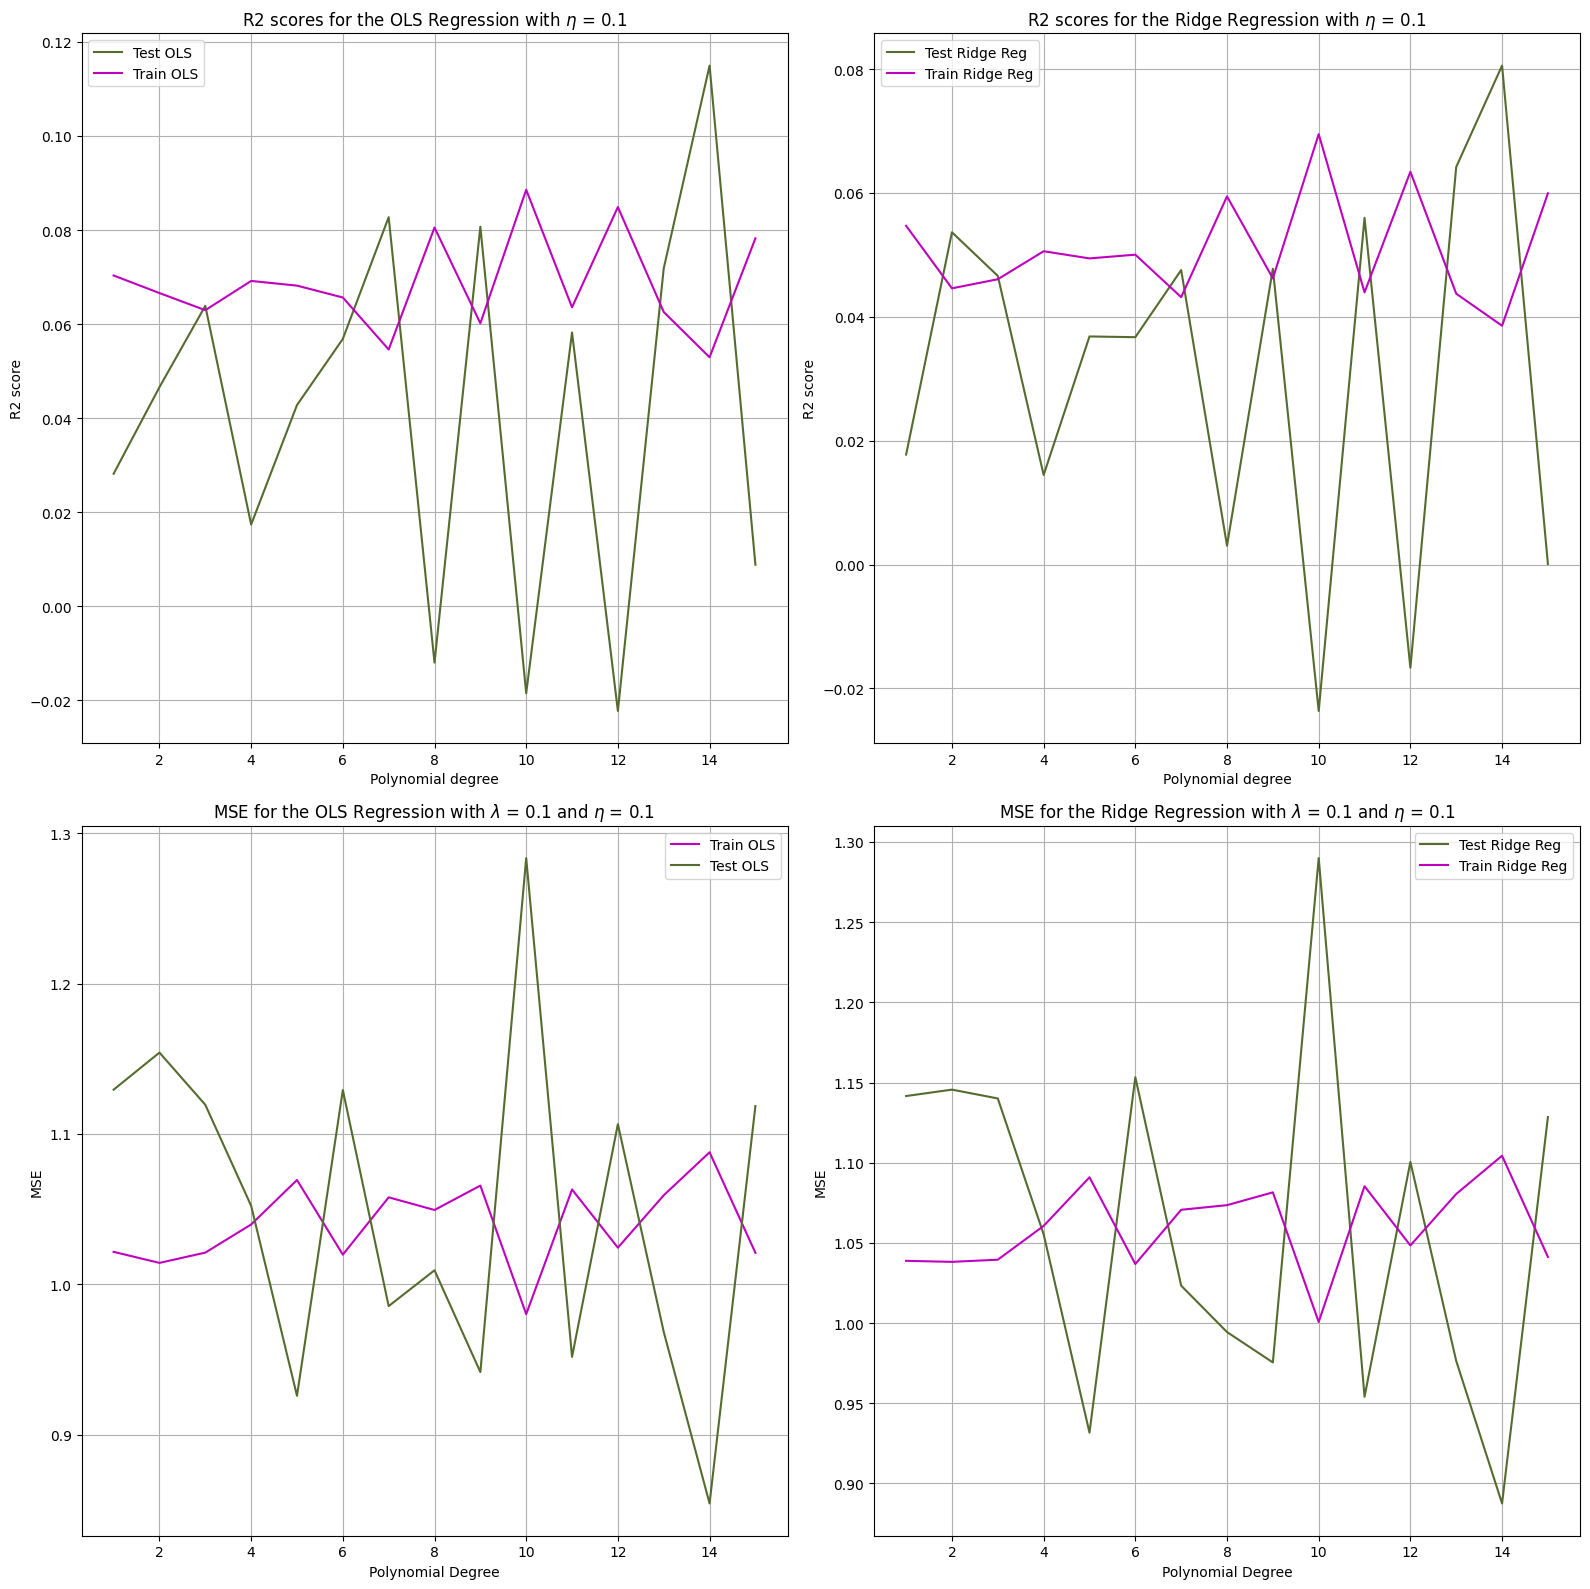

In [9]:
theta_grad_ols, theta_grad_ridge = gradient(x,y, n_feat=16)

# Exercise D

Adding:
- momentum
- ADAGrad
- RMSProp
- ADAM

In [ ]:
#prøver på nytt for momentum 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_momentum(x,y,n_feat, degree=16):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    mom = 0.3 
    v_ols = np.zeros(n_feat)
    v_ridge = np.zeros(n_feat)
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)

    #Initialize arrays to be used in the comparison subplot in a later function: 
    mse_momentum_test_ols = []
    mse_momentum_test_ridge = []
    r2_momentum_test_ols = []
    r2_momentum_test_ridge = []

    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            #calculating the change using momentum
            v_ols = mom * v_ols + eta *grad_OLSn
            #update beta
            theta_gdOLSn = theta_gdOLSn - v_ols

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            # Update parameters theta with momentum
            v_ridge = mom * v_ridge + eta * grad_Ridgen
            #updating beta
            theta_gdRidgen = theta_gdRidgen - v_ridge
            
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)

        mse_momentum_test_ols.append(mse_gdOLSn_test)
        mse_momentum_test_ridge.append(mse_gdRidgen_test)
        r2_momentum_test_ols.append(r2_gdOLSn_test)
        r2_momentum_test_ridge.append(r2_gdRidgen_test)

    return mse_momentum_test_ols, mse_momentum_test_ridge, r2_momentum_test_ols, r2_momentum_test_ridge

#If one wants to plot the resulting momentum plots directly then remove the """
#This will also display the results for the traning data - not only the test data as used in the project 1 results
#If removed - add the return statement further down instead
"""
    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with momentum")
    ax[0,1].set_title("Ridge loss with momentum")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with momentum')
    ax[1,0].set_title('R2 scores for the OLS Regression with momentum')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with momentum')
    ax[2,1].set_title('MSE for the Ridge Regression with momentum')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()
    """
    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen

#Testing if it works:
#gradient_momentum(x, y, 16)

'\n    fig,ax = plt.subplots(3,2,figsize=(16,16))\n    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")\n    ax[0,1].plot(theta_gdRidgen, color = "m", label = \'Ridge\')\n    for labels_grad in ax[0,:]:\n        labels_grad.set_ylabel(\'Iterations\')\n        labels_grad.set_xlabel(\'Theta\')\n        labels_grad.grid(True)\n        labels_grad.legend()\n    ax[0,0].set_title("OLS loss with momentum")\n    ax[0,1].set_title("Ridge loss with momentum")\n    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = \'darkolivegreen\', label = \'Test OLS\')\n    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = \'m\', label = \'Train OLS\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = \'darkolivegreen\', label = \'Test Ridge Reg\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = \'m\', label = \'Train Ridge Reg\')\n    ax[1,1].set_title(\'R2 scores for the Ridge Regression with momentum\')\n    ax[1,0].set_title(\'R2 scores for the OLS Regression with momentum\')\n    for

In [ ]:
#Adagrad 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_adagrad(x,y,n_feat, degree=16):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    Giter_ols = 0.0
    Giter_ridge = 0.0

    #Initialize arrays to be used in the comparison subplot in a later function: 
    mse_adagrad_test_ols = []
    mse_adagrad_test_ridge = []
    r2_adagrad_test_ols = []
    r2_adagrad_test_ridge = []

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            Giter_ols += grad_OLSn * grad_OLSn
            update_ols = grad_OLSn * eta / (epsilon + np.sqrt(Giter_ols))
            theta_gdOLSn -= update_ols
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            Giter_ridge += grad_Ridgen * grad_Ridgen
            update_ridge = grad_Ridgen * eta / (epsilon + np.sqrt(Giter_ridge))
            theta_gdRidgen -= update_ridge
            
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)

        mse_adagrad_test_ols.append(mse_gdOLSn_test)
        mse_adagrad_test_ridge.append(mse_gdRidgen_test)
        r2_adagrad_test_ols.append(r2_gdOLSn_test)
        r2_adagrad_test_ridge.append(r2_gdRidgen_test)

    return mse_adagrad_test_ols, mse_adagrad_test_ridge, r2_adagrad_test_ols, r2_adagrad_test_ridge
#If one wants to plot the resulting Adagrad plots directly then remove the """
#This will also display the results for the traning data - not only the test data as used in the project 1 results
#If removed - add the return statement further down instead

"""
    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with AdaGrad")
    ax[0,1].set_title("Ridge loss with AdaGrad")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with AdaGrad')
    ax[1,0].set_title('R2 scores for the OLS Regression with AdaGrad')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with Adagrad')
    ax[2,1].set_title('MSE for the Ridge Regression with AdaGrad')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen
"""

#Testing if it works
#gradient_adagrad(x, y, 16)

'\n    fig,ax = plt.subplots(3,2,figsize=(16,16))\n    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")\n    ax[0,1].plot(theta_gdRidgen, color = "m", label = \'Ridge\')\n    for labels_grad in ax[0,:]:\n        labels_grad.set_ylabel(\'Iterations\')\n        labels_grad.set_xlabel(\'Theta\')\n        labels_grad.grid(True)\n        labels_grad.legend()\n    ax[0,0].set_title("OLS loss with AdaGrad")\n    ax[0,1].set_title("Ridge loss with AdaGrad")\n    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = \'darkolivegreen\', label = \'Test OLS\')\n    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = \'m\', label = \'Train OLS\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = \'darkolivegreen\', label = \'Test Ridge Reg\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = \'m\', label = \'Train Ridge Reg\')\n    ax[1,1].set_title(\'R2 scores for the Ridge Regression with AdaGrad\')\n    ax[1,0].set_title(\'R2 scores for the OLS Regression with AdaGrad\')\n    for lab

In [ ]:
#RMSprop
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_rmsprop(x,y,n_feat, degree=16):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    Epsilon = 0.9
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    Giter_ols = 0.0
    Giter_ridge = 0.0

    #Initialize arrays to be used in the comparison subplot in a later function: 
    mse_rmsprop_test_ols = []
    mse_rmsprop_test_ridge = []
    r2_rmsprop_test_ols = []
    r2_rmsprop_test_ridge = []

    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            Giter_ols = (Epsilon * Giter_ols + (1-Epsilon) * grad_OLSn * grad_OLSn)
            update_ols = grad_OLSn * eta / (epsilon + np.sqrt(Giter_ols))
            theta_gdOLSn -= update_ols
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(num_iters):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            Giter_ridge = (Epsilon * Giter_ridge + (1-Epsilon) * grad_Ridgen * grad_Ridgen)
            update_ridge = grad_Ridgen * eta / (epsilon + np.sqrt(Giter_ridge))
            theta_gdRidgen -= update_ridge
    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)

        mse_rmsprop_test_ols.append(mse_gdOLSn_test)
        mse_rmsprop_test_ridge.append(mse_gdRidgen_test)
        r2_rmsprop_test_ols.append(r2_gdOLSn_test)
        r2_rmsprop_test_ridge.append(r2_gdRidgen_test)

    return mse_rmsprop_test_ols, mse_rmsprop_test_ridge, r2_rmsprop_test_ols, r2_rmsprop_test_ridge

#If one wants to plot the resulting momentum plots directly then remove the """
#This will also display the results for the traning data - not only the test data as used in the project 1 results
#If removed - add the return statement further down instead
"""
    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with RMSProp")
    ax[0,1].set_title("Ridge loss with RMSProp")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with RMSProp')
    ax[1,0].set_title('R2 scores for the OLS Regression with RMSProp')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with RMSProp')
    ax[2,1].set_title('MSE for the Ridge Regression with RMSProp')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen
"""

#Checking that the func works
#gradient_rmsprop(x, y, 16)

'\n    fig,ax = plt.subplots(3,2,figsize=(16,16))\n    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")\n    ax[0,1].plot(theta_gdRidgen, color = "m", label = \'Ridge\')\n    for labels_grad in ax[0,:]:\n        labels_grad.set_ylabel(\'Iterations\')\n        labels_grad.set_xlabel(\'Theta\')\n        labels_grad.grid(True)\n        labels_grad.legend()\n    ax[0,0].set_title("OLS loss with RMSProp")\n    ax[0,1].set_title("Ridge loss with RMSProp")\n    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = \'darkolivegreen\', label = \'Test OLS\')\n    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = \'m\', label = \'Train OLS\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = \'darkolivegreen\', label = \'Test Ridge Reg\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = \'m\', label = \'Train Ridge Reg\')\n    ax[1,1].set_title(\'R2 scores for the Ridge Regression with RMSProp\')\n    ax[1,0].set_title(\'R2 scores for the OLS Regression with RMSProp\')\n    for lab

In [ ]:
#ADAM 
#create dataset 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)

def gradient_adam(x,y,n_feat, degree=16):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    eta = 0.01
    lam = 0.1 #fixed lambda for the Ridge
    epsilon = 1e-8
    theta_gdOLSn = np.zeros(n_feat) #OLS
    theta_gdRidgen = np.zeros(n_feat) #Ridge
    r2_gdOLSn_test = np.zeros(degree)
    r2_gdRidgen_test = np.zeros(degree)
    r2_gdOLSn_train = np.zeros(degree)
    r2_gdRidgen_train = np.zeros(degree)
    degree_plot = np.linspace(1,degree, degree)
    mse_gdOLSn_test = np.zeros(degree)
    mse_gdOLSn_train = np.zeros(degree)
    mse_gdRidgen_test = np.zeros(degree)
    mse_gdRidgen_train = np.zeros(degree)
    theta1 = 0.9
    theta2 = 0.999
    first_moment_ols = 0.0
    second_moment_ols = 0.0
    first_moment_ridge = 0.0 
    second_moment_ridge = 0.0

    mse_adam_test_ols = []
    mse_adam_test_ridge = []
    r2_adam_test_ols = []
    r2_adam_test_ridge = []
    
    #loop
    for p in range(1,degree+1):
    #Create X_polynomial and scale 
        X = polynomial_features(x,15, intercept = False)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        scaler = StandardScaler(with_std=True)
        scaler.fit(X_train) 
        X_train_s = scaler.transform(X_train)
        X_test_s = scaler.transform(X_test)
        y_mean = np.mean(y_train)
        y_std = np.std(y_train)
        y_scaled_train = (y_train - y_mean)/y_std

        #gradient descent OLS 
        for t in range(num_iters):
            t += 1
            grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
            #first moment
            first_moment_ols = theta1 * first_moment_ols + (1 - theta1) * grad_OLSn
            second_moment_ols = theta2 * second_moment_ols + (1 - theta2) * grad_OLSn * grad_OLSn
            first_term_ols = first_moment_ols / (1-theta1 **t)
            second_term_ols = second_moment_ols / (1-theta2 **t)
            theta_gdOLSn -= eta * first_term_ols / (np.sqrt(second_term_ols) + epsilon)
    

        #gradient descent Ridge
        tol = 1e-10
        for t in range(1,num_iters+1):
        # Compute gradients for Ridge
            grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
            first_moment_ridge = theta1 * first_moment_ridge + (1 - theta1) * grad_Ridgen
            second_moment_ridge = theta2 * second_moment_ridge + (1 - theta2) * grad_Ridgen * grad_Ridgen
            first_term_ridge = first_moment_ridge / (1-theta1 **t)
            second_term_ridge = second_moment_ridge / (1-theta2 **t)
            theta_gdRidgen -= eta * first_term_ridge / (np.sqrt(second_term_ridge) + epsilon)

    
            if (np.linalg.norm(grad_Ridgen*eta) < tol):
                print(f'loop broken at {str(t)} for degree: {p}')
                break
        
        #predicting vals 
        y_pred_train_OLS = (X_train_s @ theta_gdOLSn + y_mean)
        y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
        y_pred_train_Ridge = (X_train_s @theta_gdRidgen + y_mean)
        y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
        #predicting r2 scores
        r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
        r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
        r2_gdOLSn_train[p-1] = r2_score(y_train, y_pred_train_OLS)
        r2_gdRidgen_train[p-1] = r2_score(y_train, y_pred_train_Ridge)
        #predicting mse 
        mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
        mse_gdOLSn_train[p-1] =  MSE(y_train, y_pred_train_OLS)
        mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)
        mse_gdRidgen_train[p-1] =  MSE(y_train, y_pred_train_Ridge)

        mse_adam_test_ols.append(mse_gdOLSn_test)
        mse_adam_test_ridge.append(mse_gdRidgen_test)
        r2_adam_test_ols.append(r2_gdOLSn_test)
        r2_adam_test_ridge.append(r2_gdRidgen_test)

    return mse_adam_test_ols, mse_adam_test_ridge, r2_adam_test_ols, r2_adam_test_ridge

"""
    fig,ax = plt.subplots(3,2,figsize=(16,16))
    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")
    ax[0,1].plot(theta_gdRidgen, color = "m", label = 'Ridge')
    for labels_grad in ax[0,:]:
        labels_grad.set_ylabel('Iterations')
        labels_grad.set_xlabel('Theta')
        labels_grad.grid(True)
        labels_grad.legend()
    ax[0,0].set_title("OLS loss with ADAM")
    ax[0,1].set_title("Ridge loss with ADAM")
    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[1,1].set_title('R2 scores for the Ridge Regression with ADAM')
    ax[1,0].set_title('R2 scores for the OLS Regression with ADAM')
    for labels in ax[1,:]:
        labels.set_ylabel('R2 score')
        labels.set_xlabel('Polynomial degree')
        labels.grid(True)
        labels.legend()
    ax[2,0].plot(degree_plot, mse_gdOLSn_train, color = 'm', label = 'Train OLS')
    ax[2,0].plot(degree_plot, mse_gdOLSn_test, color = 'darkolivegreen', label = 'Test OLS')
    ax[2,1].plot(degree_plot, mse_gdRidgen_test, color = 'darkolivegreen', label = 'Test Ridge Reg')
    ax[2,1].plot(degree_plot, mse_gdRidgen_train, color = 'm', label = 'Train Ridge Reg')
    ax[2,0].set_title('MSE for the OLS Regression with ADAM')
    ax[2,1].set_title('MSE for the Ridge Regression with ADAM')
    for labels_mse in ax[2,:]:
        labels_mse.set_ylabel('MSE')
        labels_mse.set_xlabel('Polynomial Degree')
        labels_mse.grid(True)
        labels_mse.legend()
    plt.tight_layout()

    #print("Gradient Descent OLS coefficients:", theta_gdOLSn)
    #print("Gradient Descent Ridge coefficients:", theta_gdRidgen)
    return theta_gdOLSn,theta_gdRidgen
""" 

#Checking if it works
#gradient_momentum(x, y, 16)

'\n    fig,ax = plt.subplots(3,2,figsize=(16,16))\n    ax[0,0].plot(theta_gdOLSn, color = "m", label = "OLS")\n    ax[0,1].plot(theta_gdRidgen, color = "m", label = \'Ridge\')\n    for labels_grad in ax[0,:]:\n        labels_grad.set_ylabel(\'Iterations\')\n        labels_grad.set_xlabel(\'Theta\')\n        labels_grad.grid(True)\n        labels_grad.legend()\n    ax[0,0].set_title("OLS loss with ADAM")\n    ax[0,1].set_title("Ridge loss with ADAM")\n    ax[1,0].plot(degree_plot,r2_gdOLSn_test, color = \'darkolivegreen\', label = \'Test OLS\')\n    ax[1,0].plot(degree_plot,r2_gdOLSn_train, color = \'m\', label = \'Train OLS\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_test, color = \'darkolivegreen\', label = \'Test Ridge Reg\')\n    ax[1,1].plot(degree_plot,r2_gdRidgen_train, color = \'m\', label = \'Train Ridge Reg\')\n    ax[1,1].set_title(\'R2 scores for the Ridge Regression with ADAM\')\n    ax[1,0].set_title(\'R2 scores for the OLS Regression with ADAM\')\n    for labels in ax[1,

# Exercise 1B på nytt

In [21]:
from func_list import Ridge_parameters

def heatmap_ridge(intercept=False, degree=16):

    n_list=(300, 400, 500)
    np.random.seed(3155)
    nlambdas = 16
    lambdas = np.logspace(-5, 1, nlambdas)
    
    for n in [300,400,500]:
        x = np.linspace(-1, 1, n)
        denominator = 1+(25*x**2)
        y = 1.0 / denominator + np.random.normal(0, 1, x.shape)

        mse_train = np.zeros((degree, nlambdas))
        mse_test  = np.zeros((degree, nlambdas))
        r2_train  = np.zeros((degree, nlambdas))
        r2_test   = np.zeros((degree, nlambdas))

        for p in range(1, degree + 1):
            X = polynomial_features(x, p, intercept=intercept)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3155)

            scaler = StandardScaler(with_std=True)
            X_train_s = scaler.fit_transform(X_train)
            X_test_s  = scaler.transform(X_test)

            y_mean = y_train.mean()
            y_center = y_train - y_mean / np.std(y)

            for j, lmb in enumerate(lambdas):
                beta = Ridge_parameters(X_train_s, y_center, lmb)

                y_pred_tr = X_train_s @ beta + y_mean
                y_pred_te = X_test_s  @ beta + y_mean

                mse_train[p-1, j] = MSE(y_train, y_pred_tr)
                mse_test [p-1, j] = MSE(y_test,  y_pred_te)
                r2_train [p-1, j] = r2_score(y_train, y_pred_tr)
                r2_test  [p-1, j] = r2_score(y_test,  y_pred_te)

        xticks = [f'{lmb:.1e}' for lmb in lambdas]
        yticks = np.arange(1, degree + 1)
        cmap = 'PiYG'

        fig_mse, axes_mse = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
        sns.heatmap(mse_train, ax=axes_mse[0], xticklabels=xticks, yticklabels=yticks, cmap=cmap, cbar=True)
        axes_mse[0].set_title(f'MSE Ridge Regression Train n={n}')
        axes_mse[0].set_xlabel(r'$\lambda$')
        axes_mse[0].set_ylabel('Polynomial degree')
        axes_mse[0].invert_yaxis()
        axes_mse[0].invert_xaxis()
        axes_mse[0].tick_params(axis='x', rotation=45)

        sns.heatmap(mse_test, ax=axes_mse[1], xticklabels=xticks, yticklabels=yticks, cmap=cmap, cbar=True)
        axes_mse[1].set_title(f'MSE Ridge Regression Test n={n}')
        axes_mse[1].set_xlabel(r'$\lambda$')
        axes_mse[1].set_ylabel('Polynomial degree')
        axes_mse[1].invert_yaxis()
        axes_mse[1].invert_xaxis()
        axes_mse[1].tick_params(axis='x', rotation=45)

        fig_r2, axes_r2 = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)
        sns.heatmap(r2_train, ax=axes_r2[0], xticklabels=xticks, yticklabels=yticks, cmap=cmap, cbar=True, vmin=0.0, vmax=1.0)
        
        axes_r2[0].set_title(f'$R^2$ Ridge Regression Train n={n}')
        axes_r2[0].set_xlabel(r'$\lambda$')
        axes_r2[0].set_ylabel('Polynomial degree')
        axes_r2[0].invert_yaxis()
        axes_r2[0].invert_xaxis()
        axes_r2[0].tick_params(axis='x', rotation=45)

        sns.heatmap(r2_test, ax=axes_r2[1], xticklabels=xticks, yticklabels=yticks, cmap=cmap, cbar=True, vmin=0.0, vmax=1.0)
        axes_r2[1].set_title(f'$R^2$ Ridge Regression Test n={n}')
        axes_r2[1].set_xlabel(r'$\lambda$') 
        axes_r2[1].set_ylabel('Polynomial degree')
        axes_r2[1].invert_yaxis()
        axes_r2[1].invert_xaxis()
        axes_r2[1].tick_params(axis='x', rotation=45)
        
        plt.show()

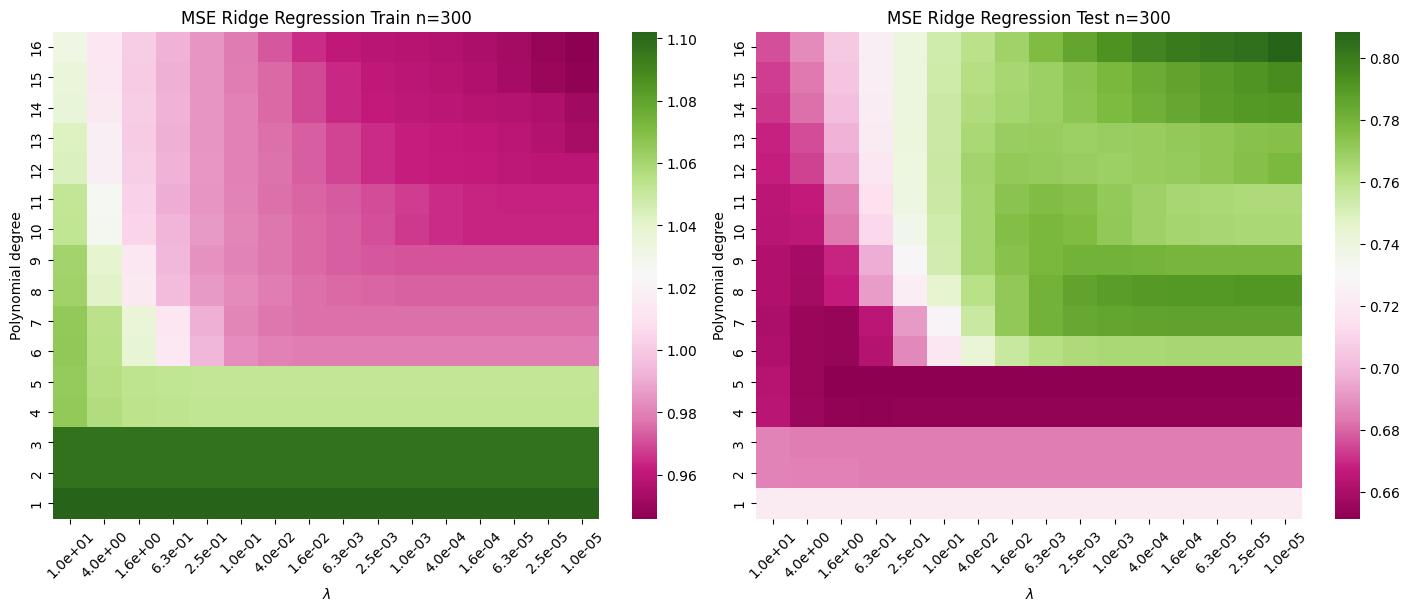

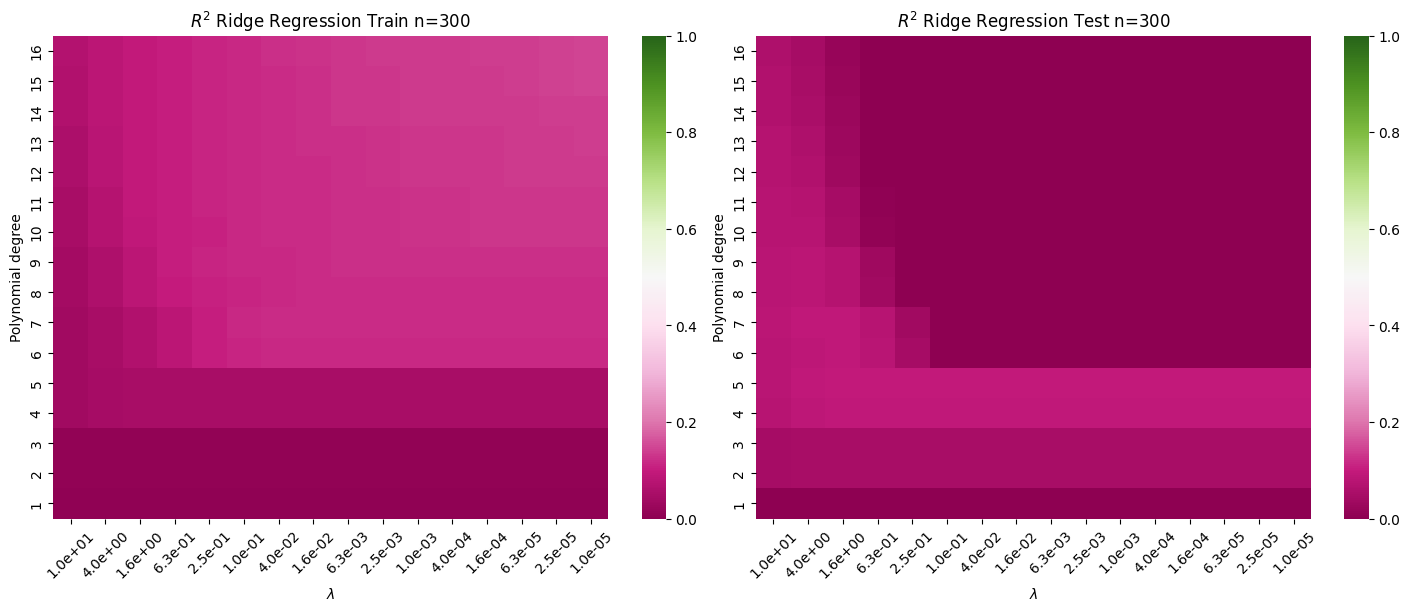

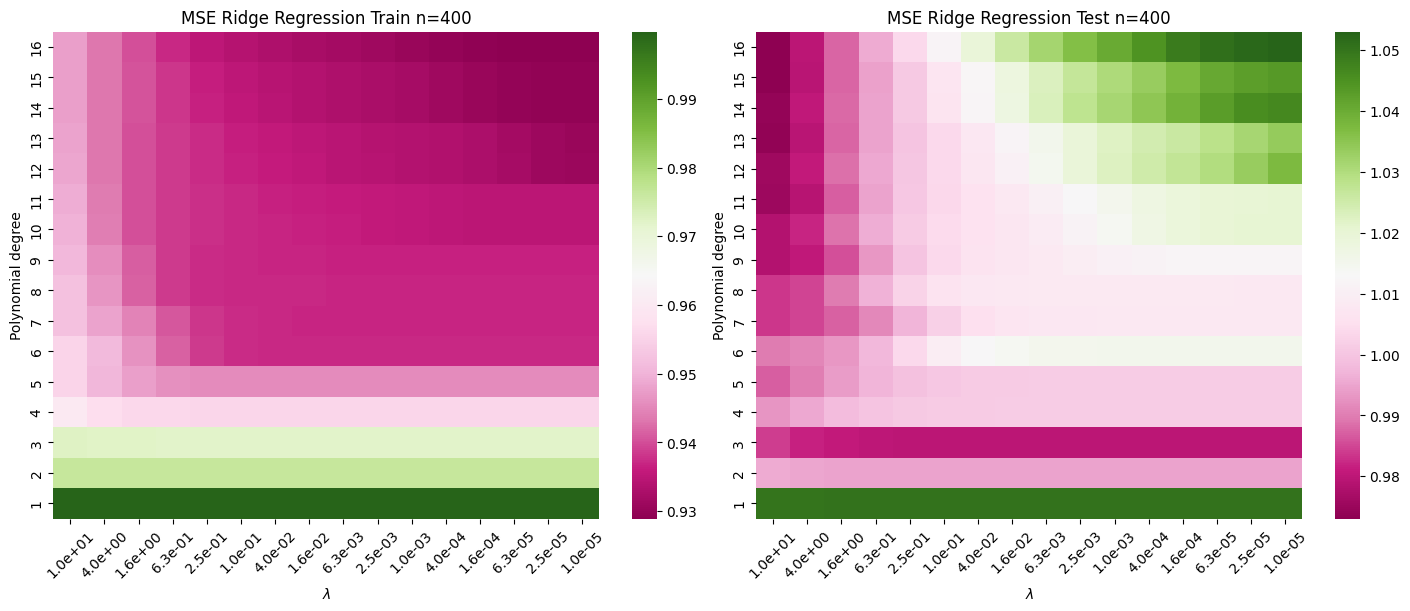

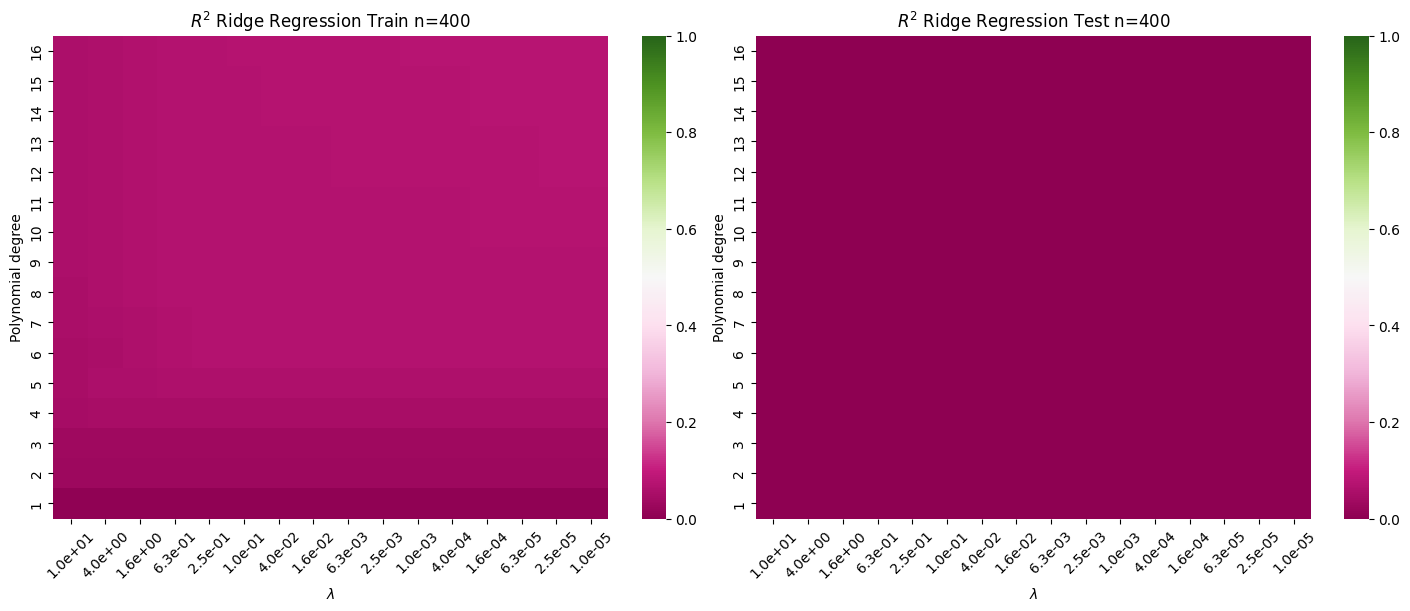

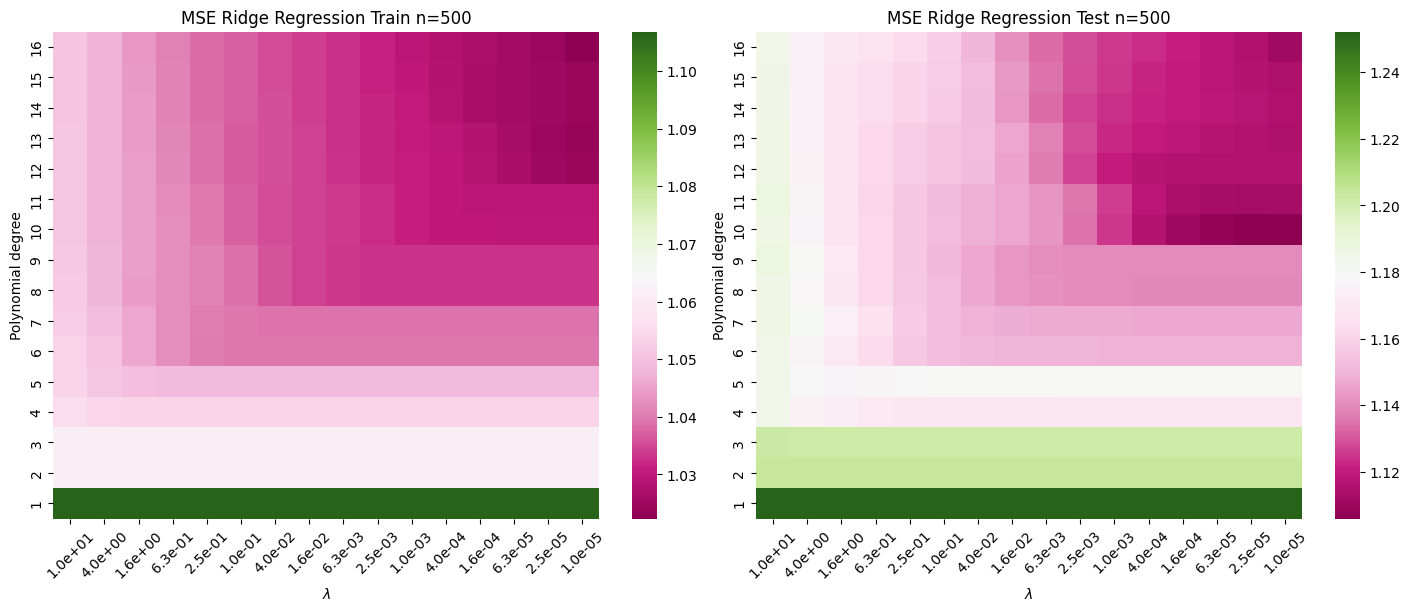

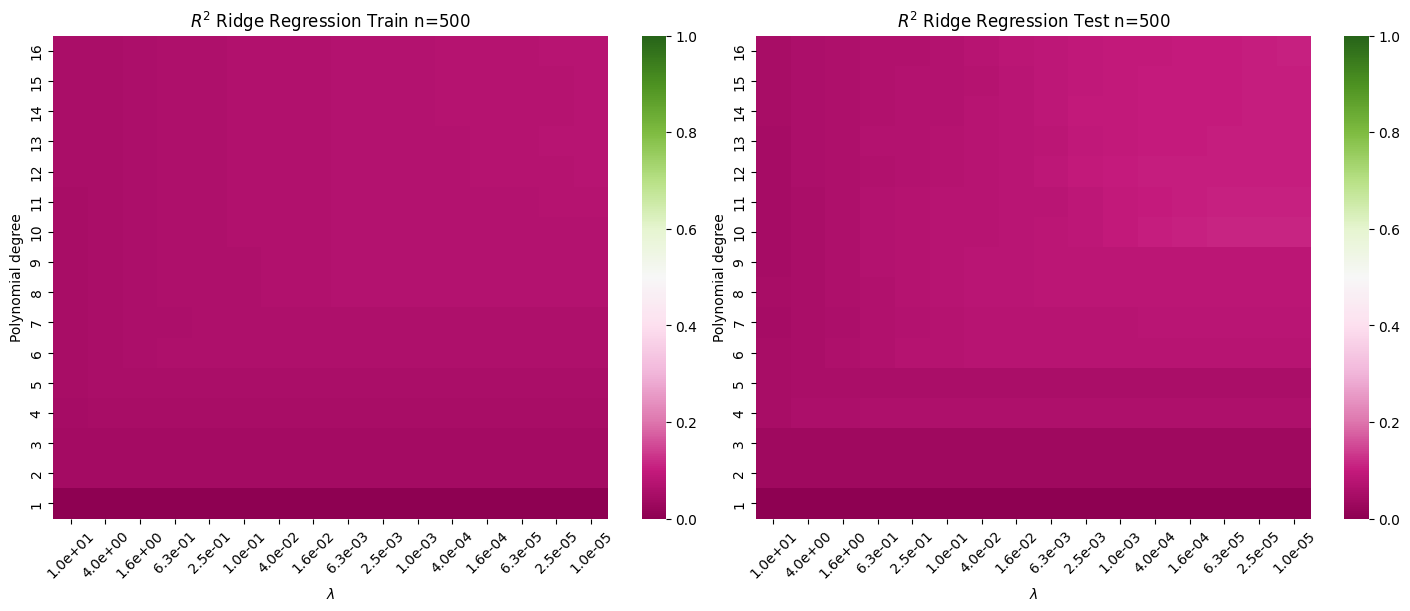

In [22]:
heatmap_ridge()

In [16]:
#create dataset 
n = 1000
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator + np.random.normal(0, 1, x.shape)
iter = 1

def gradient(x,y,n_feat, degree=15):
    np.random.seed(3155)
    #define variables 
    num_iters = 1000
    lam = 0.1 #fixed lambda for the Ridge
    mse_test_plot = []
    r2_test_plot = []
    mse_test_plot_ridge = []
    r2_test_plot_ridge = []
    for eta_vary in [0.01, 0.05, 0.1]:
        n = len(y)
        r2_gdOLSn_test = np.zeros(degree)
        r2_gdRidgen_test = np.zeros(degree)
        degree_plot = np.linspace(1,degree, degree)
        mse_gdOLSn_test = np.zeros(degree)
        mse_gdRidgen_test = np.zeros(degree)
        theta_gdOLSn = np.zeros(n_feat) #OLS
        theta_gdRidgen = np.zeros(n_feat) #Ridge
        
        #loop
        for p in range(1,degree+1):
        #Create X_polynomial and scale 
            X = polynomial_features(x,15, intercept = False)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
            scaler = StandardScaler(with_std=True)
            scaler.fit(X_train) 
            X_train_s = scaler.transform(X_train)
            X_test_s = scaler.transform(X_test)
            y_mean = np.mean(y_train)
            y_std = np.std(y_train)
            y_scaled_train = (y_train - y_mean)/y_std

            #gradient descent OLS 
            for t in range(num_iters):
                grad_OLSn = (2.0/n)*X_train_s.T @ (X_train_s @ theta_gdOLSn-y_scaled_train)
                theta_gdOLSn -= grad_OLSn * eta_vary

            #gradient descent Ridge
            tol = 1e-10
            for t in range(num_iters):
            # Compute gradients for Ridge
                grad_Ridgen = (2.0/n)*X_train_s.T @ (X_train_s @ (theta_gdRidgen)-y_scaled_train)+2*lam*theta_gdRidgen
                # Update parameters theta
                theta_gdRidgen -= grad_Ridgen * eta_vary

                if (np.linalg.norm(grad_Ridgen*eta_vary) < tol):
                    print(f'loop broken at {str(t)} for degree: {p}')
                    break
        
            #predicting vals 
            y_pred_test_OLS = (X_test_s @ theta_gdOLSn + y_mean)
            y_pred_test_Ridge = (X_test_s @ theta_gdRidgen + y_mean)
            #predicting r2 scores
            r2_gdOLSn_test[p-1] = r2_score(y_test, y_pred_test_OLS)
            r2_gdRidgen_test[p-1] = r2_score(y_test, y_pred_test_Ridge)
            #predicting mse 
            mse_gdOLSn_test[p-1] =  MSE(y_test, y_pred_test_OLS)
            mse_gdRidgen_test[p-1] = MSE(y_test, y_pred_test_Ridge)

        mse_test_plot.append(mse_gdOLSn_test)
        r2_test_plot.append(r2_gdOLSn_test)
        mse_test_plot_ridge.append(mse_gdRidgen_test)
        r2_test_plot_ridge.append(r2_gdRidgen_test)
    
    liste = [0.01, 0.05, 0.1]
        
    fig1, ax1 = plt.subplots(1,2,figsize=(14,6))
    for i, eta_vary in enumerate(liste):
        ax1[0].plot(degree_plot,mse_test_plot[i], label = f"Eta = {eta_vary}")
        ax1[1].plot(degree_plot,r2_test_plot[i], label = f'Eta = {eta_vary}')
    ax1[0].set_title("MSE for OLS with GD")                                    
    ax1[1].set_title("R2 for OLS with GD")
    ax1[0].set_xlabel('Polynomial degree')
    ax1[0].set_ylabel('MSE')
    ax1[0].grid(True)
    ax1[0].legend()
    ax1[1].set_xlabel('Polynomial degree')
    ax1[1].set_ylabel('R2 score')
    ax1[1].grid(True)
    ax1[1].legend()
    fig1 = plt.suptitle('Gradient Descent for OLS - Test data')
    fig1 = plt.tight_layout()

    fig2,ax2 = plt.subplots(1,2,figsize=(14,6))
    for j, eta_vary in enumerate(liste):
        ax2[0].plot(degree_plot, mse_test_plot_ridge[j], label = f'Eta = {eta_vary}')
        ax2[1].plot(degree_plot, r2_test_plot_ridge[j], label = f'Eta = {eta_vary}')
    ax2[0].set_title("MSE for Ridge with GD")                                    
    ax2[1].set_title("R2 for Ridge with GD")
    ax2[0].set_xlabel('Polynomial degree')
    ax2[0].set_ylabel('MSE')
    ax2[0].grid(True)
    ax2[0].legend()
    ax2[1].set_xlabel('Polynomial degree')
    ax2[1].set_ylabel('R2 score')
    ax2[1].grid(True)
    ax2[1].legend()
    fig2 = plt.suptitle(f'Gradient Descent for Ridge - Test data')
    fig2 = plt.tight_layout()

    #plt.tight_layout()
    plt.show()


loop broken at 756 for degree: 1
loop broken at 679 for degree: 2
loop broken at 714 for degree: 3
loop broken at 723 for degree: 4
loop broken at 726 for degree: 5
loop broken at 710 for degree: 6
loop broken at 691 for degree: 7
loop broken at 701 for degree: 8
loop broken at 709 for degree: 9
loop broken at 711 for degree: 10
loop broken at 733 for degree: 11
loop broken at 690 for degree: 12
loop broken at 705 for degree: 13
loop broken at 697 for degree: 14
loop broken at 718 for degree: 15


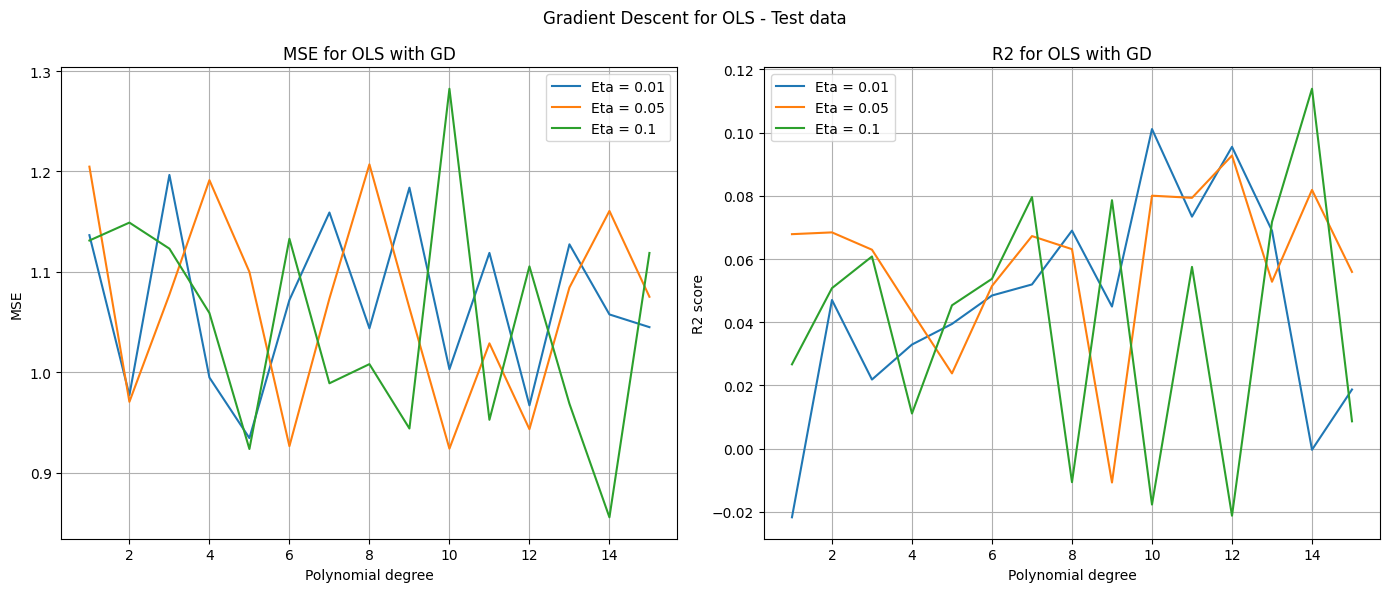

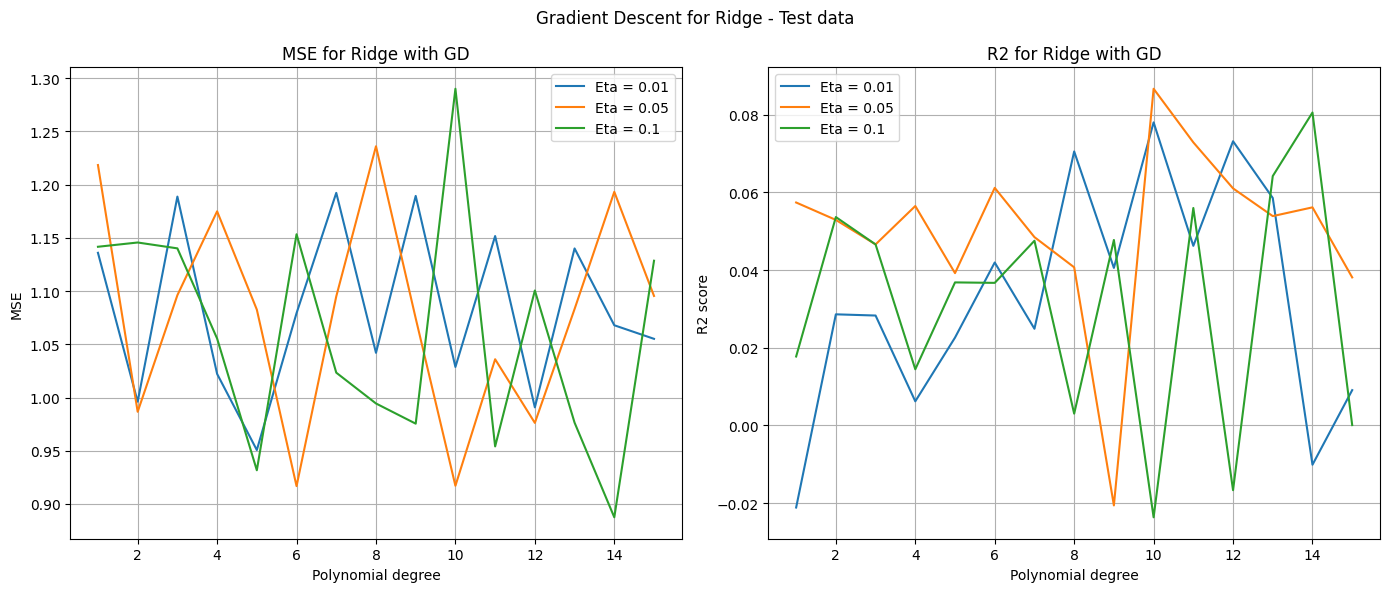

In [17]:
gradient(x, y, 16)

In [18]:
#comparing the effective learning rates 
n = 100
x = np.linspace(-1,1, n) #x within interval [-1,1]
denominator = 1+(25*x**2)
y = 1/denominator# + np.random.normal(0, 1, x.shape)



In [19]:
#Collected plot for all the updating learning rates 

def all_learning_rates_plot(x=x, y=y, n_feat=16):

    #Run all the above codes:
    mse_momentum_ols, mse_momentum_ridge, r2_momentum_ols, r2_momentum_ridge = gradient_momentum(x,y,n_feat)
    mse_adagrad_ols, mse_adagrad_ridge, r2_adagrad_ols, r2_adagrad_ridge = gradient_adagrad(x,y,n_feat)
    mse_rmsprop_ols, mse_rmsprop_ridge , r2_rmsprop_ols, r2_rmsprop_ridge = gradient_rmsprop(x,y,n_feat)
    mse_adam_ols, mse_adam_ridge, r2_adam_ols, r2_adam_ridge = gradient_adam(x,y,n_feat)
    #linspace for x
    degree = 16
    x_lab = np.linspace(1,degree,degree)
    print(mse_momentum_ols)
    fig1,ax1 = plt.subplots(1,2,figsize=(16,8))

    ax1[0].plot(x_lab, mse_momentum_ols[0], label = 'Momentum', color = 'm')
    ax1[0].plot(x_lab, mse_adagrad_ols[0], label = 'AdaGrad', color = 'darkolivegreen')
    ax1[0].plot(x_lab, mse_rmsprop_ols[0], label = 'RMSProp', color = 'royalblue')
    ax1[0].plot(x_lab, mse_adam_ols[0], label = 'Adam', color = 'sienna')
    ax1[1].plot(x_lab, r2_momentum_ols[0], label = 'Momentum', color = 'm')
    ax1[1].plot(x_lab, r2_adagrad_ols[0], label = 'Adagrad', color = 'darkolivegreen')
    ax1[1].plot(x_lab, r2_rmsprop_ols[0], label = 'RMSProp', color = 'royalblue')
    ax1[1].plot(x_lab, r2_adam_ols[0], label = 'Adam', color = 'sienna')
    fig1 = plt.suptitle(f'Gradient Descent with updated learningrates for OLS')
    fig1 = plt.tight_layout()

   

    fig2,ax2 = plt.subplots(1,2,figsize=(16,8))
    ax2[0].plot(x_lab,mse_momentum_ridge[0], label = 'Momentum', color = 'm')
    ax2[0].plot(x_lab, mse_adagrad_ridge[0], label = 'AdaGrad', color = 'darkolivegreen')
    ax2[0].plot(x_lab, mse_rmsprop_ridge[0], label = 'RMSProp', color = 'royalblue')
    ax2[0].plot(x_lab, mse_adam_ridge[0], label = 'Adam', color = 'sienna')
    ax2[1].plot(x_lab, r2_momentum_ridge[0], label = 'Momentum', color = 'm')
    ax2[1].plot(x_lab, r2_adagrad_ridge[0], label = 'Adagrad', color = 'darkolivegreen')
    ax2[1].plot(x_lab, r2_rmsprop_ridge[0], label = 'RMSProp', color = 'royalblue')
    ax2[1].plot(x_lab, r2_adam_ridge[0], label = 'Adam', color = 'sienna')

    #setting titles and labels 
    ax1[0].set_xlabel('Polynomial Degree')
    ax1[1].set_xlabel('Polynomial Degree')
    ax2[0].set_xlabel('Polynomial Degree')
    ax2[1].set_xlabel('Polynomial Degree')

    ax1[0].set_ylabel('MSE')
    ax2[0].set_ylabel('MSE')
    ax1[1].set_ylabel(r'$R^2$')
    ax2[1].set_ylabel(r'$R^2$')

    ax1[0].set_title(f'MSE for Test data')
    ax2[0].set_title(f'MSE for Test data')
    ax1[1].set_title(r' $R^2$ score for Test data')
    ax2[1].set_title(r' $R^2$ score for Test data')

    ax1[0].grid(True)
    ax1[1].grid(True)
    ax2[0].grid(True)
    ax2[1].grid(True)
    ax1[0].legend()
    ax1[1].legend()
    ax2[0].legend()
    ax2[1].legend()

    fig2 = plt.suptitle(f'Gradient Descent with updated learningrates for Ridge')
    fig2 = plt.tight_layout()

    

loop broken at 566 for degree: 1
loop broken at 484 for degree: 2
loop broken at 521 for degree: 3
loop broken at 503 for degree: 4
loop broken at 486 for degree: 5
loop broken at 471 for degree: 6
loop broken at 514 for degree: 7
loop broken at 484 for degree: 8
loop broken at 480 for degree: 9
loop broken at 515 for degree: 10
loop broken at 475 for degree: 11
loop broken at 496 for degree: 12
loop broken at 490 for degree: 13
loop broken at 523 for degree: 14
loop broken at 508 for degree: 15
loop broken at 456 for degree: 16
loop broken at 684 for degree: 1
loop broken at 451 for degree: 2
loop broken at 367 for degree: 3
loop broken at 285 for degree: 4
loop broken at 305 for degree: 5
loop broken at 316 for degree: 6
loop broken at 301 for degree: 7
loop broken at 276 for degree: 8
loop broken at 296 for degree: 9
loop broken at 294 for degree: 10
loop broken at 276 for degree: 11
loop broken at 300 for degree: 12
loop broken at 298 for degree: 13
loop broken at 298 for degree: 1

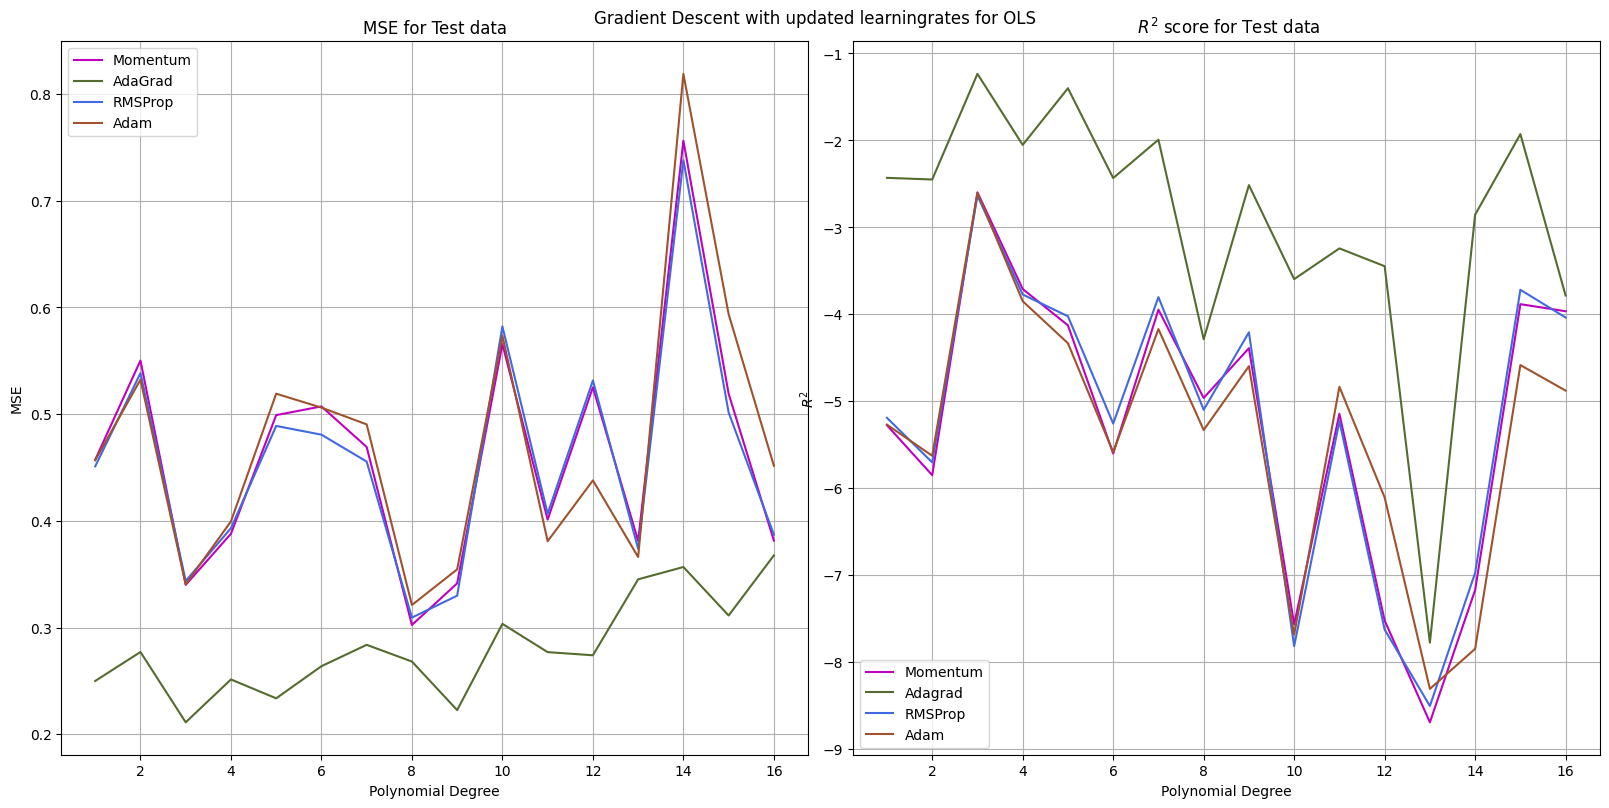

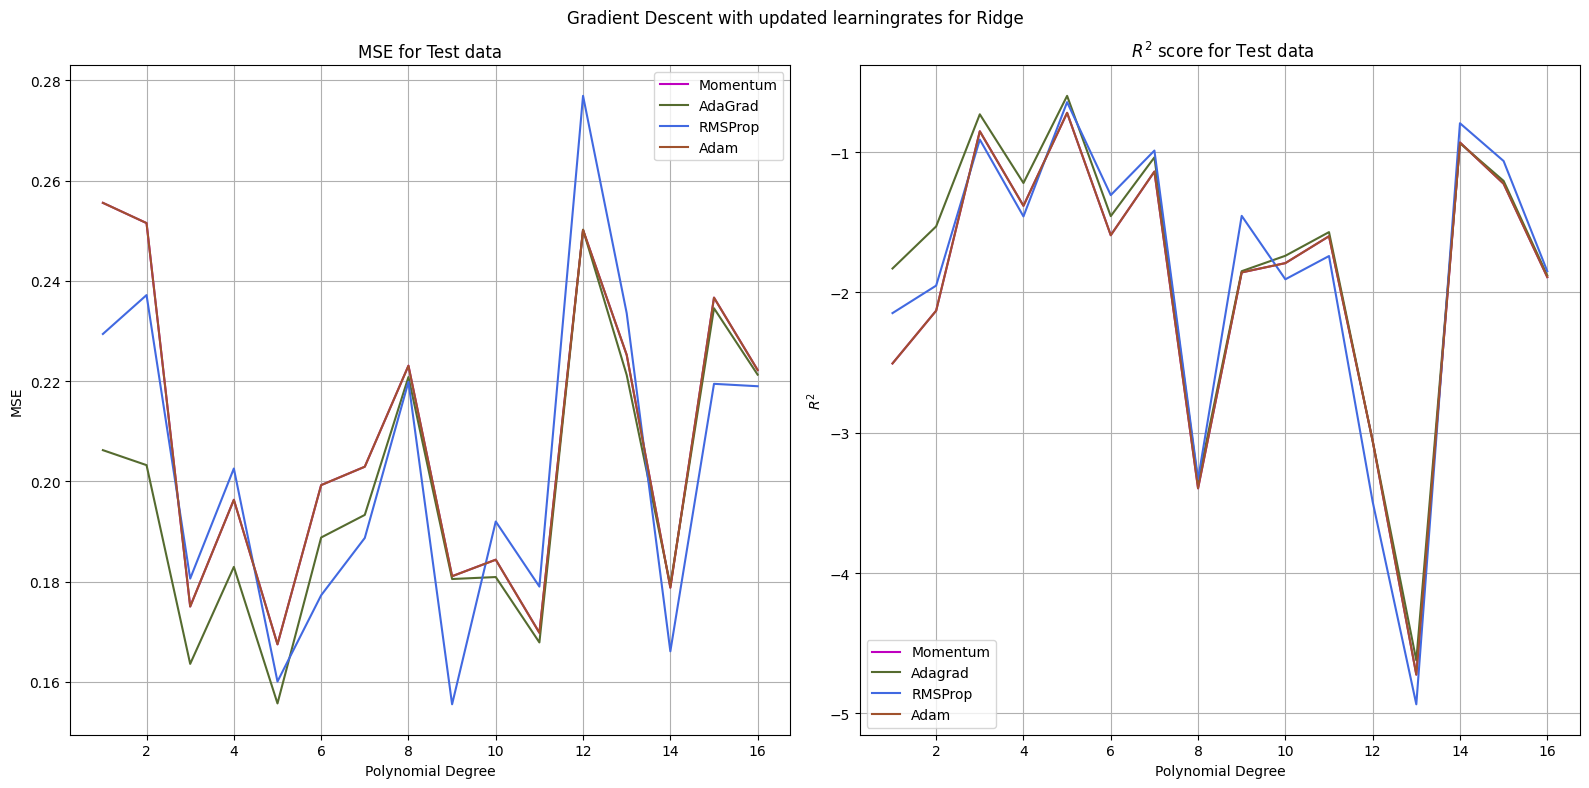

In [20]:
all_learning_rates_plot()
